In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

In [3]:
path = os.getcwd()
print(path)

/workspace/code


In [4]:
pd.set_option('display.max_rows', 120)

In [5]:
df_class = pd.read_csv('/workspace/data/class.csv')
df_zoo =pd.read_csv('/workspace/data/zoo.csv')

## 脊椎動物(哺乳類、鳥類、爬虫類、両生類、魚類）と無脊椎動物の分布  
Class_Number 1:哺乳類  
Class_Number 2:鳥類  
Class_Number 3:爬虫類  
Class_Number 4:魚類  
Class_Number 5:両生類  
Class_Number 6:昆虫  
Class_Number 7:無脊椎動物(昆虫以外)

In [6]:
df_class

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


## 教師データ  
動物の特徴を「0」「1」で表現している  

hair:毛があるか  
feathers:羽毛があるか  
eggs:卵生か  
milk:胎生か  
airborne:空を飛べるか  
aquatic:海中にいるか  
toothed:歯があるか  
predator:捕食者か  
backbone:背骨があるか
breathes:肺呼吸か
venomous:毒があるか
fins:ヒレの枚数
legs:足の数
tail:しっぽがあるか
domestic:家畜化されているか
catsize:猫くらいの大きさがあるか

class_type:どれに分類されるか(正解データ)


In [6]:
df_zoo.head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


## 探索的データ分析(EDA)

### 1.データのサイズやタイプ、欠損値がないか確認する

欠損値もない綺麗なデータということがわかる

In [9]:
df_zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


### 2.データの基本統計量を確認する

pandasのdescribe関数で基本統計量　最頻値,算術平均,標準偏差,最小値,最大値,中央値等を表示する  
今回は0,1の2値しかないのであまり意味がない

In [10]:
df_zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [17]:
df_zoo['class_type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

In [19]:
df_zoo.animal_name.unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

array([[<AxesSubplot:title={'center':'hair'}>,
        <AxesSubplot:title={'center':'feathers'}>,
        <AxesSubplot:title={'center':'eggs'}>,
        <AxesSubplot:title={'center':'milk'}>],
       [<AxesSubplot:title={'center':'airborne'}>,
        <AxesSubplot:title={'center':'aquatic'}>,
        <AxesSubplot:title={'center':'predator'}>,
        <AxesSubplot:title={'center':'toothed'}>],
       [<AxesSubplot:title={'center':'backbone'}>,
        <AxesSubplot:title={'center':'breathes'}>,
        <AxesSubplot:title={'center':'venomous'}>,
        <AxesSubplot:title={'center':'fins'}>],
       [<AxesSubplot:title={'center':'legs'}>,
        <AxesSubplot:title={'center':'tail'}>,
        <AxesSubplot:title={'center':'domestic'}>,
        <AxesSubplot:title={'center':'catsize'}>],
       [<AxesSubplot:title={'center':'class_type'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

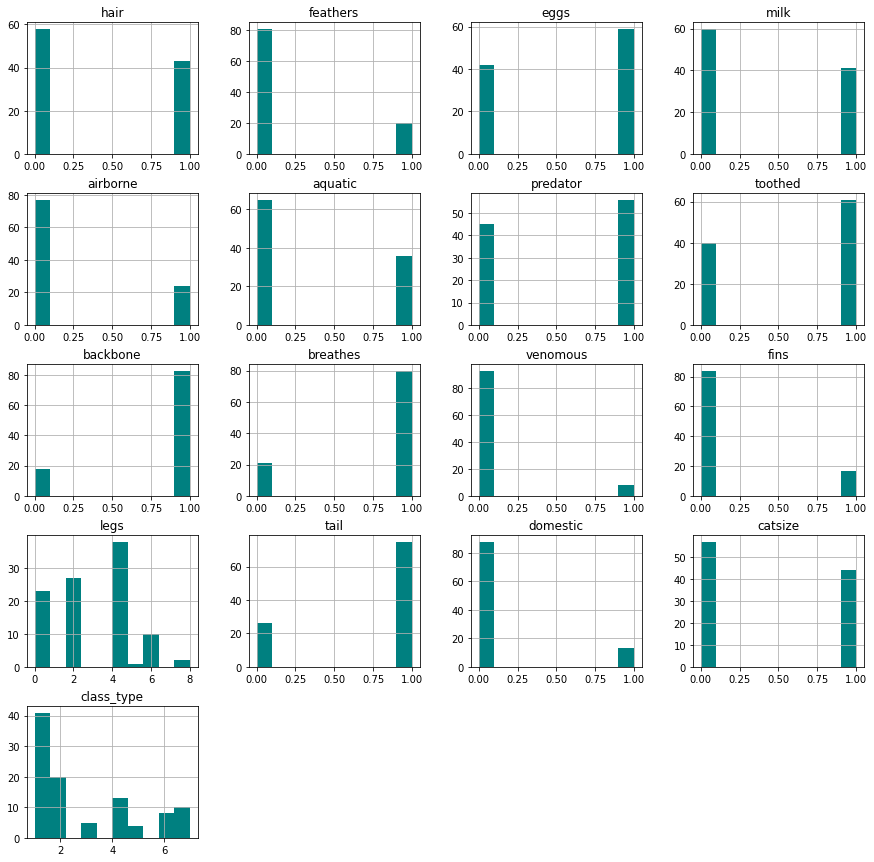

In [24]:
df_zoo.hist(bins=10,figsize=(15,15), color = 'teal')

### 相関係数をheatmapで表示

In [27]:
df_zoo_corr = df_zoo.corr()

<AxesSubplot:>

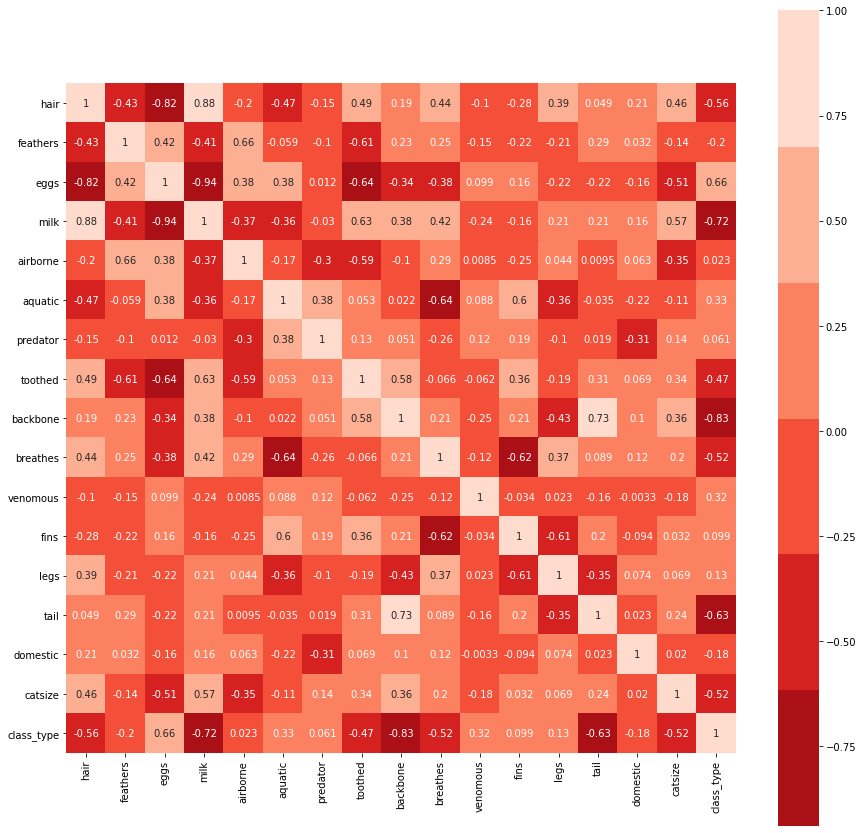

In [46]:
plt.figure(figsize=(15,15))
cmap = sns.color_palette("Reds_r")
sns.heatmap(df_zoo_corr, square=True, annot=True, cmap=cmap)

### 特定の値の行の抽出

1.Dataframeのqueryを使う  
2.リスト形式のフィルタを使う

Class_typeが1(哺乳類)を抽出する

In [ ]:
df_zoo.query('class_type == 1')

In [28]:
df_zoo[df_zoo.class_type == 1]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1
10,cheetah,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
17,deer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
19,dolphin,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1


### 哺乳類だけのデータでヒストグラムを表示

array([[<AxesSubplot:title={'center':'hair'}>,
        <AxesSubplot:title={'center':'feathers'}>,
        <AxesSubplot:title={'center':'eggs'}>,
        <AxesSubplot:title={'center':'milk'}>],
       [<AxesSubplot:title={'center':'airborne'}>,
        <AxesSubplot:title={'center':'aquatic'}>,
        <AxesSubplot:title={'center':'predator'}>,
        <AxesSubplot:title={'center':'toothed'}>],
       [<AxesSubplot:title={'center':'backbone'}>,
        <AxesSubplot:title={'center':'breathes'}>,
        <AxesSubplot:title={'center':'venomous'}>,
        <AxesSubplot:title={'center':'fins'}>],
       [<AxesSubplot:title={'center':'legs'}>,
        <AxesSubplot:title={'center':'tail'}>,
        <AxesSubplot:title={'center':'domestic'}>,
        <AxesSubplot:title={'center':'catsize'}>],
       [<AxesSubplot:title={'center':'class_type'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

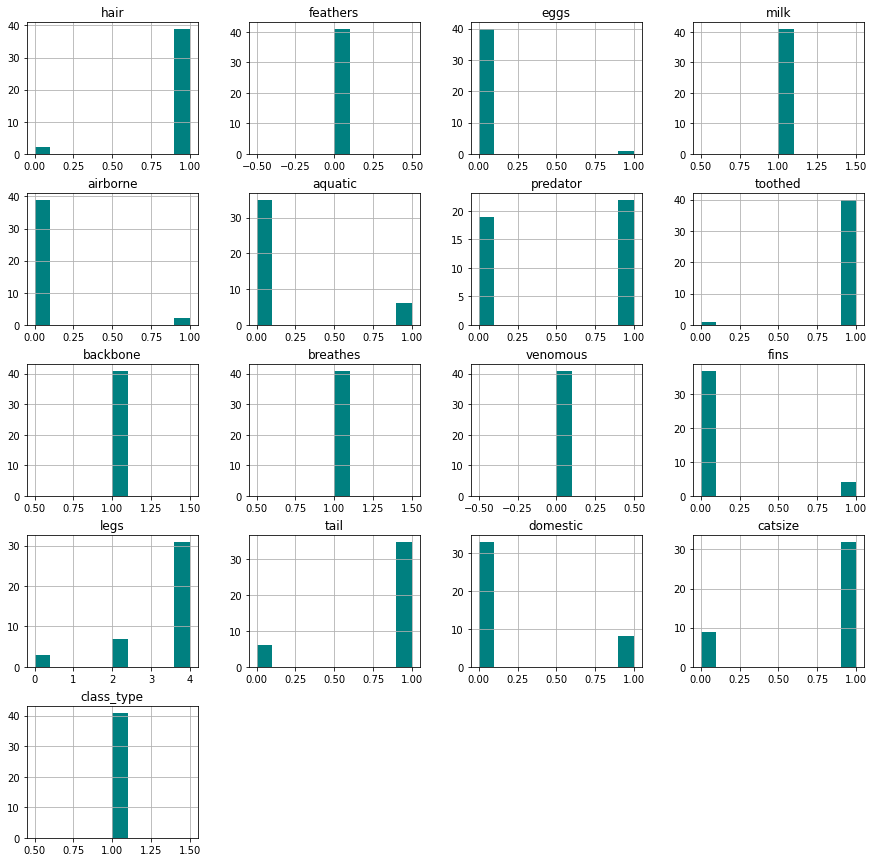

In [30]:
df_zoo[df_zoo.class_type == 1].hist(bins=10,figsize=(15,15), color = 'teal')

### 鳥類だけのデータでヒストグラムを表示

array([[<AxesSubplot:title={'center':'hair'}>,
        <AxesSubplot:title={'center':'feathers'}>,
        <AxesSubplot:title={'center':'eggs'}>,
        <AxesSubplot:title={'center':'milk'}>],
       [<AxesSubplot:title={'center':'airborne'}>,
        <AxesSubplot:title={'center':'aquatic'}>,
        <AxesSubplot:title={'center':'predator'}>,
        <AxesSubplot:title={'center':'toothed'}>],
       [<AxesSubplot:title={'center':'backbone'}>,
        <AxesSubplot:title={'center':'breathes'}>,
        <AxesSubplot:title={'center':'venomous'}>,
        <AxesSubplot:title={'center':'fins'}>],
       [<AxesSubplot:title={'center':'legs'}>,
        <AxesSubplot:title={'center':'tail'}>,
        <AxesSubplot:title={'center':'domestic'}>,
        <AxesSubplot:title={'center':'catsize'}>],
       [<AxesSubplot:title={'center':'class_type'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

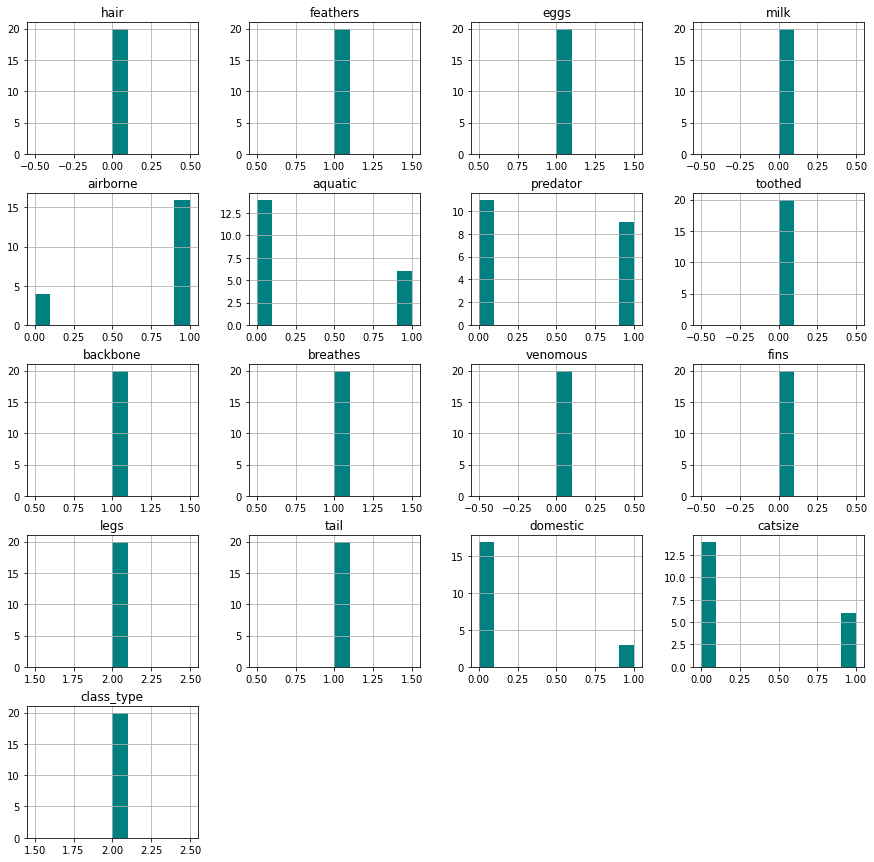

In [8]:
df_zoo[df_zoo.class_type == 2].hist(bins=10,figsize=(15,15), color = 'teal')

### 爬虫類だけのデータでヒストグラムを表示

array([[<AxesSubplot:title={'center':'hair'}>,
        <AxesSubplot:title={'center':'feathers'}>,
        <AxesSubplot:title={'center':'eggs'}>,
        <AxesSubplot:title={'center':'milk'}>],
       [<AxesSubplot:title={'center':'airborne'}>,
        <AxesSubplot:title={'center':'aquatic'}>,
        <AxesSubplot:title={'center':'predator'}>,
        <AxesSubplot:title={'center':'toothed'}>],
       [<AxesSubplot:title={'center':'backbone'}>,
        <AxesSubplot:title={'center':'breathes'}>,
        <AxesSubplot:title={'center':'venomous'}>,
        <AxesSubplot:title={'center':'fins'}>],
       [<AxesSubplot:title={'center':'legs'}>,
        <AxesSubplot:title={'center':'tail'}>,
        <AxesSubplot:title={'center':'domestic'}>,
        <AxesSubplot:title={'center':'catsize'}>],
       [<AxesSubplot:title={'center':'class_type'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

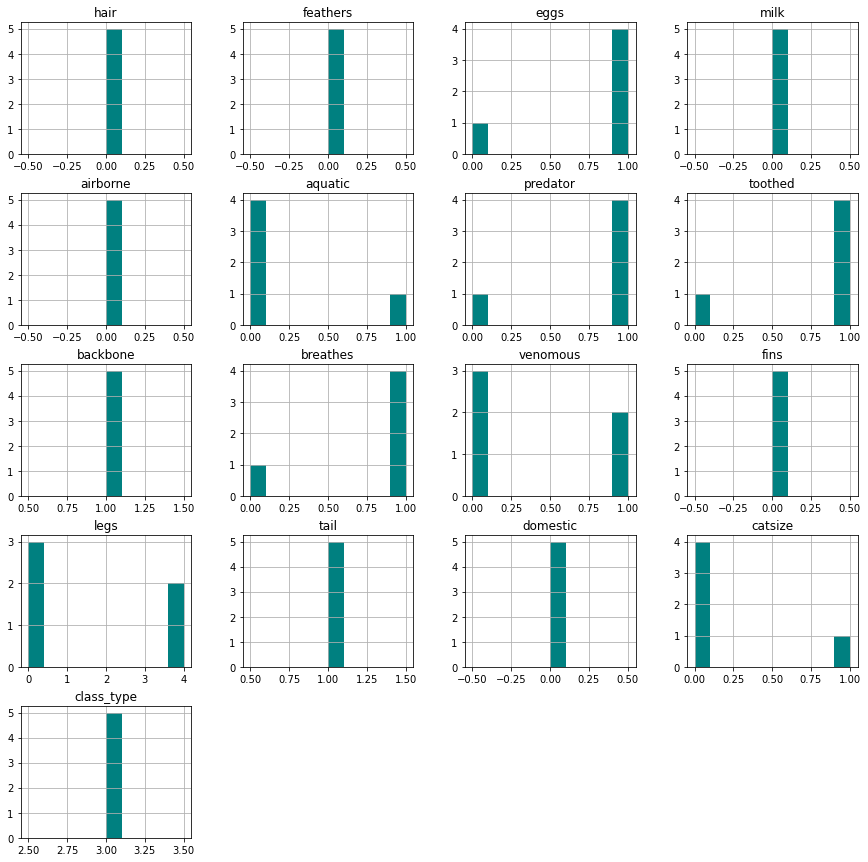

In [9]:
df_zoo[df_zoo.class_type == 3].hist(bins=10,figsize=(15,15), color = 'teal')

### 魚類だけのデータでヒストグラムを表示

array([[<AxesSubplot:title={'center':'hair'}>,
        <AxesSubplot:title={'center':'feathers'}>,
        <AxesSubplot:title={'center':'eggs'}>,
        <AxesSubplot:title={'center':'milk'}>],
       [<AxesSubplot:title={'center':'airborne'}>,
        <AxesSubplot:title={'center':'aquatic'}>,
        <AxesSubplot:title={'center':'predator'}>,
        <AxesSubplot:title={'center':'toothed'}>],
       [<AxesSubplot:title={'center':'backbone'}>,
        <AxesSubplot:title={'center':'breathes'}>,
        <AxesSubplot:title={'center':'venomous'}>,
        <AxesSubplot:title={'center':'fins'}>],
       [<AxesSubplot:title={'center':'legs'}>,
        <AxesSubplot:title={'center':'tail'}>,
        <AxesSubplot:title={'center':'domestic'}>,
        <AxesSubplot:title={'center':'catsize'}>],
       [<AxesSubplot:title={'center':'class_type'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

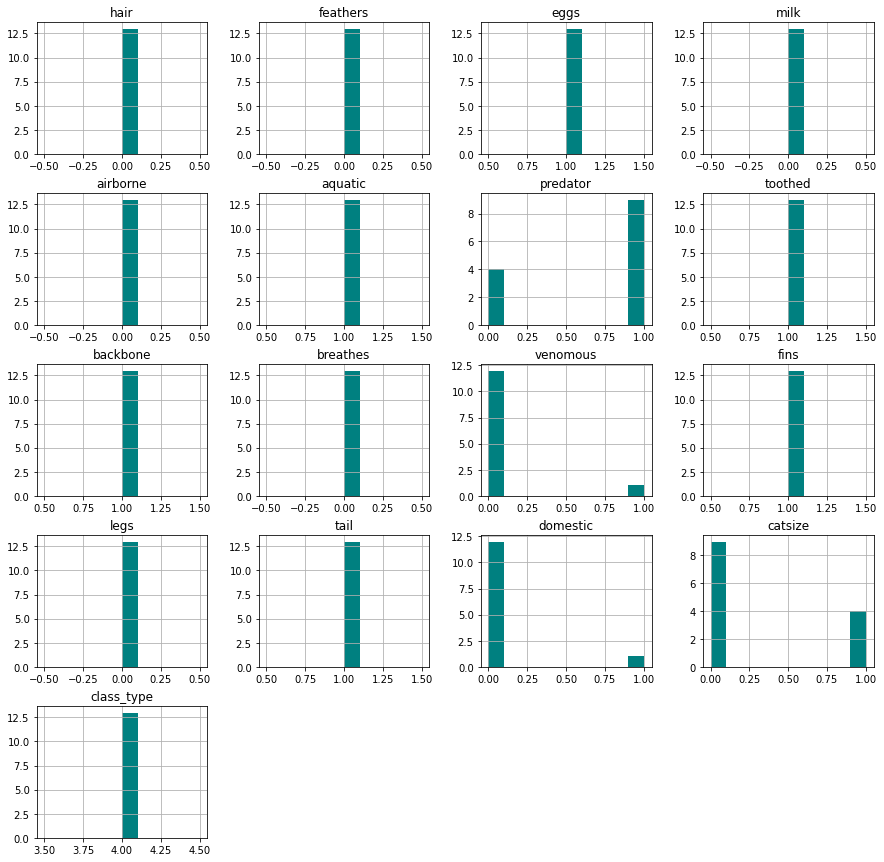

In [13]:
df_zoo[df_zoo.class_type == 4].hist(bins=10,figsize=(15,15), color = 'teal')

### 毒ある魚類って何？  
答えは「エイ」

In [16]:
# 2つのカラム＆条件指定をしてフィルタリング
df_zoo[(df_zoo.class_type == 4) & (df_zoo.venomous == 1)]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
86,stingray,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,4


In [17]:
df_zoo.query('class_type == 4 & catsize == 1')

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
18,dogfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4
60,pike,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4
86,stingray,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,4
92,tuna,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4


### 両生類だけのデータでヒストグラムを表示

array([[<AxesSubplot:title={'center':'hair'}>,
        <AxesSubplot:title={'center':'feathers'}>,
        <AxesSubplot:title={'center':'eggs'}>,
        <AxesSubplot:title={'center':'milk'}>],
       [<AxesSubplot:title={'center':'airborne'}>,
        <AxesSubplot:title={'center':'aquatic'}>,
        <AxesSubplot:title={'center':'predator'}>,
        <AxesSubplot:title={'center':'toothed'}>],
       [<AxesSubplot:title={'center':'backbone'}>,
        <AxesSubplot:title={'center':'breathes'}>,
        <AxesSubplot:title={'center':'venomous'}>,
        <AxesSubplot:title={'center':'fins'}>],
       [<AxesSubplot:title={'center':'legs'}>,
        <AxesSubplot:title={'center':'tail'}>,
        <AxesSubplot:title={'center':'domestic'}>,
        <AxesSubplot:title={'center':'catsize'}>],
       [<AxesSubplot:title={'center':'class_type'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

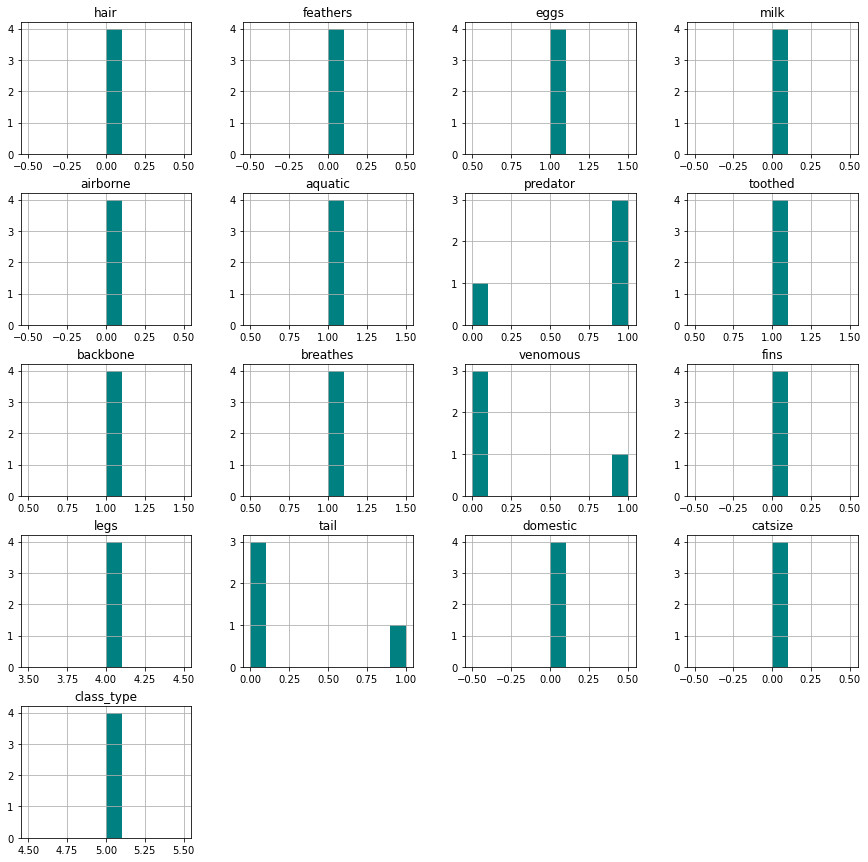

In [18]:
df_zoo[df_zoo.class_type == 5].hist(bins=10,figsize=(15,15), color = 'teal')

### 昆虫だけのデータでヒストグラムを表示

array([[<AxesSubplot:title={'center':'hair'}>,
        <AxesSubplot:title={'center':'feathers'}>,
        <AxesSubplot:title={'center':'eggs'}>,
        <AxesSubplot:title={'center':'milk'}>],
       [<AxesSubplot:title={'center':'airborne'}>,
        <AxesSubplot:title={'center':'aquatic'}>,
        <AxesSubplot:title={'center':'predator'}>,
        <AxesSubplot:title={'center':'toothed'}>],
       [<AxesSubplot:title={'center':'backbone'}>,
        <AxesSubplot:title={'center':'breathes'}>,
        <AxesSubplot:title={'center':'venomous'}>,
        <AxesSubplot:title={'center':'fins'}>],
       [<AxesSubplot:title={'center':'legs'}>,
        <AxesSubplot:title={'center':'tail'}>,
        <AxesSubplot:title={'center':'domestic'}>,
        <AxesSubplot:title={'center':'catsize'}>],
       [<AxesSubplot:title={'center':'class_type'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

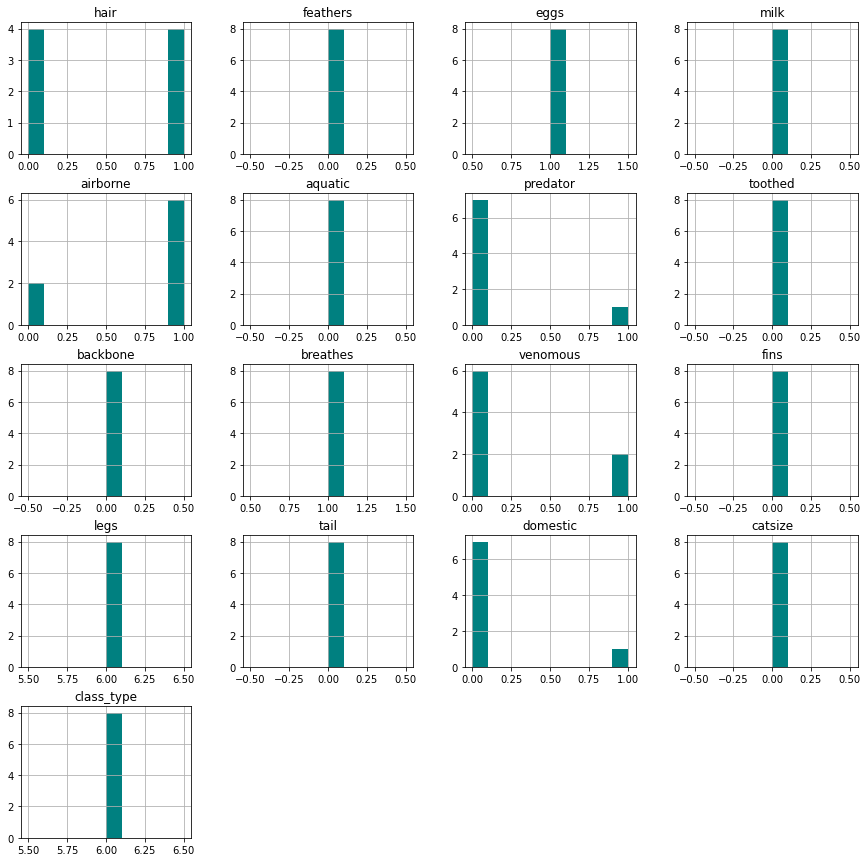

In [20]:
df_zoo[df_zoo.class_type == 6].hist(bins=10,figsize=(15,15), color = 'teal')

### 無脊椎動物だけのデータでヒストグラムを表示

array([[<AxesSubplot:title={'center':'hair'}>,
        <AxesSubplot:title={'center':'feathers'}>,
        <AxesSubplot:title={'center':'eggs'}>,
        <AxesSubplot:title={'center':'milk'}>],
       [<AxesSubplot:title={'center':'airborne'}>,
        <AxesSubplot:title={'center':'aquatic'}>,
        <AxesSubplot:title={'center':'predator'}>,
        <AxesSubplot:title={'center':'toothed'}>],
       [<AxesSubplot:title={'center':'backbone'}>,
        <AxesSubplot:title={'center':'breathes'}>,
        <AxesSubplot:title={'center':'venomous'}>,
        <AxesSubplot:title={'center':'fins'}>],
       [<AxesSubplot:title={'center':'legs'}>,
        <AxesSubplot:title={'center':'tail'}>,
        <AxesSubplot:title={'center':'domestic'}>,
        <AxesSubplot:title={'center':'catsize'}>],
       [<AxesSubplot:title={'center':'class_type'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

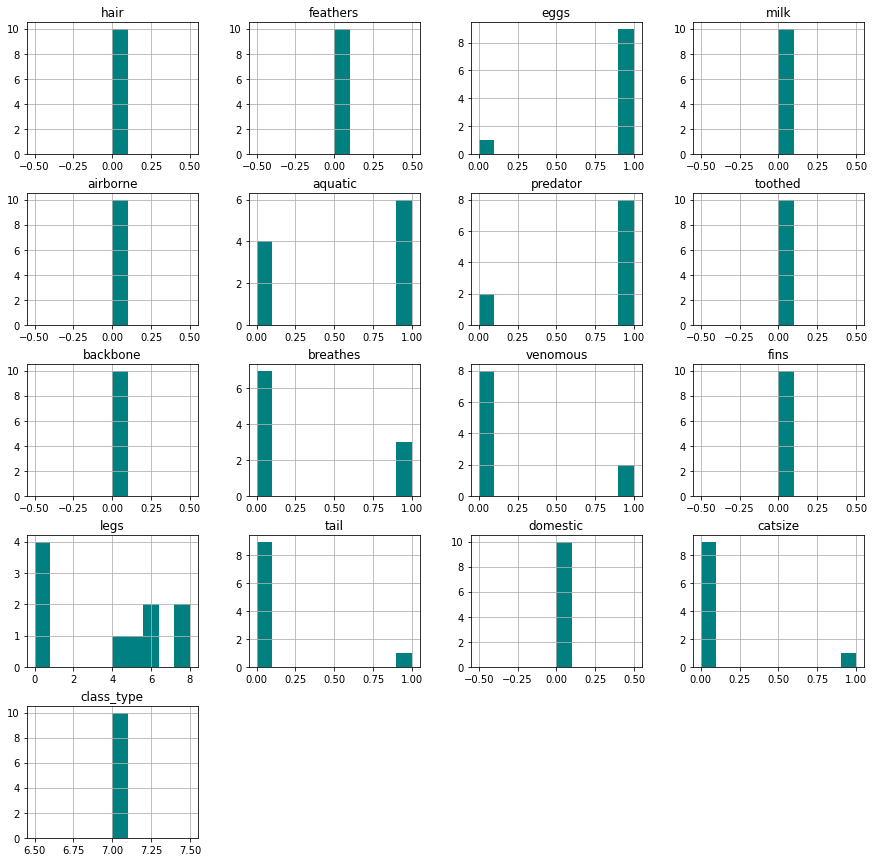

In [25]:
df_zoo[df_zoo.class_type == 7].hist(bins=10,figsize=(15,15), color = 'teal')

## 決定木で分類してみる

### データの前処理  
1.データセットをtrainとtestに分割

In [164]:
df_zoo[0:6]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


#### トレーニングデータとテストデータに分割

In [165]:
# 再現のためランダムステートを固定にする
df_zoo_train, df_zoo_test = train_test_split(df_zoo, test_size=0.3,random_state=1)

#### トレーニングデータを特徴量と目的変数に分ける

In [166]:
df_zoo_train

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
73,seahorse,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4
19,dolphin,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1
27,fruitbat,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0,1
48,mink,1,0,0,1,0,1,1,1,1,1,0,0,4,1,0,1,1
58,penguin,0,1,1,0,0,1,1,0,1,1,0,0,2,1,0,1,2
90,tortoise,0,0,1,0,0,0,0,0,1,1,0,0,4,1,0,1,3
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
53,octopus,0,0,1,0,0,1,1,0,0,0,0,0,8,0,0,1,7
51,moth,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
74,seal,1,0,0,1,0,1,1,1,1,1,0,1,0,0,0,1,1


In [167]:
# 全て行と0最初から16列まで列を取得
df_zoo_data = df_zoo_train.iloc[:,1:-1]

In [168]:
df_zoo_target = df_zoo_train.iloc[:,-1:]

#### テストデータもトレーニングデータと同様に処理(特徴量と目的変数に分割)

In [150]:
#列を削除する場合は以下
#df_zoo_test = df_zoo_answer.drop(df_zoo_answer.columns[17:],axis=1)
#列名指定   df.drop(['state', 'point'], axis=1))
#列番号指定 df.drop(df.columns[[1, 2]], axis=1))

In [174]:
df_zoo_test_data = df_zoo_test.iloc[:,1:-1]
df_zoo_test_target = df_zoo_test.iloc[:,-1:]

In [170]:
df_zoo_data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
73,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0
19,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1
27,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0
48,1,0,0,1,0,1,1,1,1,1,0,0,4,1,0,1
58,0,1,1,0,0,1,1,0,1,1,0,0,2,1,0,1


In [177]:
df_zoo_target.head()

,class_type
73,4
19,1
27,1
48,1
58,2


In [178]:
df_zoo_test_data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
94,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0
78,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0
17,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
100,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0
36,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0


In [179]:
df_zoo_test_target.head()

,class_type
94,1
78,2
17,1
100,2
36,1


### 学習(決定木)

In [180]:
from sklearn import tree

In [206]:
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(df_zoo_data, df_zoo_target)

In [207]:
  # 作成したモデルを用いて予測を実行
  predicted = clf.predict(df_zoo_data)
  
  # 予測結果の出力(正解データとの比較)
  print('=============== predicted ===============')
  print(predicted)
  print('============== correct_ans ==============')
  print(df_zoo_target['class_type'].values)
  print('=============== id_rate =================')
  print(sum(predicted == df_zoo_target['class_type'].values) / len(df_zoo_target['class_type'].values))

=============== predicted ===============
[4 1 1 1 2 3 1 7 6 1 2 4 2 2 1 7 1 2 1 4 5 6 2 2 6 1 3 5 1 2 6 1 1 6 1 7 4
 4 1 3 2 1 4 1 4 6 7 1 4 7 1 1 2 4 2 1 5 1 2 3 1 2 1 2 1 1 1 7 4 2]
============== correct_ans ==============
[4 1 1 1 2 3 1 7 6 1 2 4 2 2 1 7 1 2 1 4 5 7 2 2 6 1 3 5 1 2 6 1 1 6 1 7 4
 4 1 3 2 1 4 1 4 6 7 1 4 7 1 1 2 4 2 1 5 1 2 3 1 2 1 2 1 1 1 7 4 2]
=============== id_rate =================
0.9857142857142858


In [209]:
  predicted_test = clf.predict(df_zoo_test_data)
  
  # 予測結果の出力(正解データとの比較)
  print('=============== predicted ===============')
  print(predicted_test)
  print('============== correct_ans ==============')
  print(df_zoo_test_target['class_type'].values)
  print('=============== id_rate =================')
  print(sum(predicted_test == df_zoo_test_target['class_type'].values) / len(df_zoo_test_target['class_type'].values))

=============== predicted ===============
[1 2 1 2 1 7 1 2 4 3 2 1 1 1 1 1 1 1 6 3 2 1 6 6 4 7 7 1 4 1 1]
============== correct_ans ==============
[1 2 1 2 1 7 1 2 4 5 2 1 1 1 1 1 1 1 7 3 2 1 6 6 4 7 6 1 4 1 1]
=============== id_rate =================
0.9032258064516129


In [247]:
fti = clf.feature_importances_ 

In [250]:
fti.shape

(16,)

In [257]:
df_fti = pd.DataFrame(fti,columns=['Feature importances'],index=['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize'])

In [260]:
df_fti.sort_values('Feature importances',ascending=False)

,Feature importances
milk,0.378610
feathers,0.232344
fins,0.158658
backbone,0.086044
predator,0.079186
tail,0.065158
hair,0.000000
eggs,0.000000
airborne,0.000000
aquatic,0.000000


In [263]:
print(predicted != df_zoo_target['class_type'])

73    False
19    False
27    False
48    False
58    False
90    False
98    False
53    False
51    False
74    False
23    False
34    False
87    False
56    False
69    False
15    False
84    False
41    False
45    False
92    False
26    False
99     True
43    False
59    False
24    False
4     False
62    False
89    False
49    False
21    False
88    False
3     False
96    False
30    False
47    False
77    False
8     False
60    False
0     False
91    False
57    False
22    False
61    False
63    False
7     False
97    False
13    False
68    False
86    False
14    False
29    False
28    False
11    False
18    False
20    False
50    False
25    False
6     False
71    False
76    False
1     False
16    False
64    False
79    False
5     False
75    False
9     False
72    False
12    False
37    False
Name: class_type, dtype: bool


In [282]:
df_zoo[-2:-1]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [283]:
print(predicted_test != df_zoo_test_target['class_type'])

94     False
78     False
17     False
100    False
36     False
85     False
55     False
83     False
82     False
52      True
95     False
44     False
31     False
93     False
65     False
35     False
66     False
70     False
81      True
80     False
33     False
32     False
40     False
39     False
38     False
46     False
42      True
10     False
2      False
54     False
67     False
Name: class_type, dtype: bool


In [286]:
df_zoo[52:53]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
52,newt,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,0,5


In [288]:
df_zoo[81:82]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
81,slug,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [289]:
df_zoo[42:43]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
42,ladybird,0,0,1,0,1,0,1,0,0,1,0,0,6,0,0,0,6


In [290]:
df_zoo[df_zoo.class_type == 3]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
62,pitviper,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0,3
76,seasnake,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,3
80,slowworm,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0,3
90,tortoise,0,0,1,0,0,0,0,0,1,1,0,0,4,1,0,1,3
91,tuatara,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
